In [11]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np

In [12]:
centroids = [(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

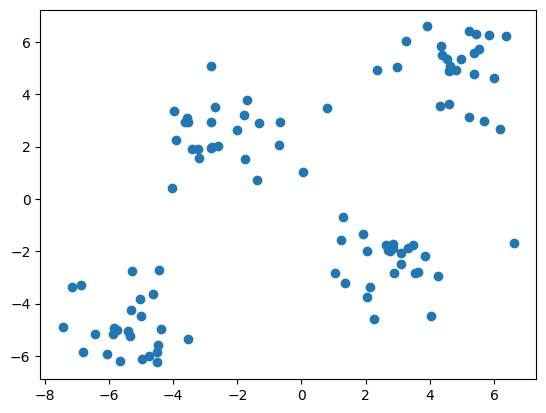

In [13]:
plt.scatter(X[:,0],X[:,1])
plt.show()

## K Means Scratch Implementation :

In [14]:
class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None


    def fit_predict(self,X):
        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)   
        self.centroids = X[random_index]  # Initialize Centroids

        for i in range(self.max_iter):
            cluster_group = self.assign_cluster(X) # Assign clusters
            old_centroids = self.centroids 
            self.centroids = self.move_centroids(X,cluster_group) # New Centroids

            if (old_centroids == self.centroids).all():  # Check Convergence
                break
        
        return cluster_group


    def assign_cluster(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid, row-centroid)))  # Euclidean distance

            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)
    

    def move_centroids(self,X,cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)   # Unique clusters 

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)


In [15]:
km = KMeans(n_clusters=4,max_iter=50)
y_means = km.fit_predict(X)

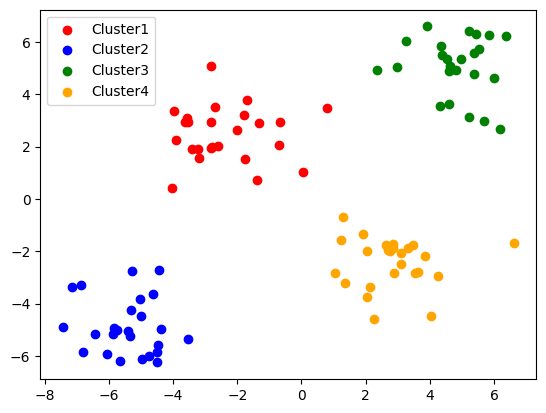

In [16]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red',label='Cluster1')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue',label='Cluster2')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green',label='Cluster3')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='orange',label='Cluster4')
plt.legend()
plt.show()

In [17]:
df = pd.read_csv('student_clustering.csv')
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [18]:
km = KMeans(n_clusters=4,max_iter=150)

X = df.iloc[:,:].values
y_means = km.fit_predict(X)

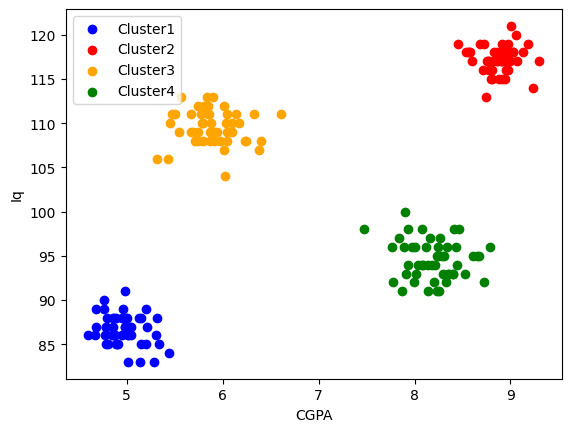

In [19]:
plt.scatter(X[y_means ==0,0],X[y_means ==0,1],color='blue',label='Cluster1')
plt.scatter(X[y_means ==1,0],X[y_means ==1,1],color='red',label='Cluster2')
plt.scatter(X[y_means ==2,0],X[y_means ==2,1],color='orange',label='Cluster3')
plt.scatter(X[y_means ==3,0],X[y_means ==3,1],color='green',label='Cluster4')
plt.xlabel("CGPA")
plt.ylabel("Iq")
plt.legend()
plt.show()